**Anomaly Detection**

Import the libraries and data

In [9]:
import os, io, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly as py

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
df= pd.read_csv('Tool_Sensor_Data.csv')

Quick overview of the dataset

In [15]:
df.head()

,TimeStamp,ToolName,TOOL_ID,Run,RunStartTime,DATA_QUALITY,EQPType,HasComments,LOT_ID,LogicalRecipeID,LotPurposeType,LotType,MachineRecipeID,PhysicalRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RECIPE_ID,ReticleID,RouteID,Technology,WAFER_ID,OunhHslCRwIRilo,iezpXSIRyQ,GPTmghByqMSY,pZXcGFNpzPf,BmpcKiosIw,XnKsCBLOqH,GEErHMkWtLOrD,ATisLDMDDfZrI,ZhitvZfLGQzyC,SwpYipezsdueC,YiAwOaAhwskZcEfg,CxPgKZCqQsFtMQZdEkFTQ,EcBnlzqiTwFxSSBTvYsYOOaCax,UYmpqidlVJQGSXnENDNUVUTbp,QveHzspDQenotLMRwWdjK,tzEiBNrESroInUjAStFCzgiCYU,OeFBBIdvVlvVTeDufgEbQZtuB,TyPUktVeQlH,ArsbiQzICA,ueAWtcWKJJ,WLGtKKqZiN,EHVtYhnRGb,YffEHvEJjM,TNfKYBQBdc,ETYSQPkJNbQsmWtwf,dCEQyYYpj,taQyPEGv,XSOeMfJAB,SYklrMAXe,jQVGDTFl,YDlkDLfFEEi,CYiycrAoYbg,oUWQRhjudAd,dSqlDZohVx,pIzvhgujbH,XAsiHMsvPv,RUNSjtpEAy,YATWcaRqpB,nJdvUmCcjI,NACdQXDDBP,NyUITkJtCGK,QesumGN,ETcatZBXS,RnVvcKsHhDEyb,tMqophNywoUtXsGZAeVHBvtFjuyM,WTcLPnkDtRwBuCou,EventType,EventName,EventId,EventSource,EventDescription,AlarmCode,AlarmStatus,VcnDxeRWVfK,HxXxxvS,LqnSjZtcJs,vmZiUljnYP,yqScxEFPLde,jrsnDLYHnMHD,CalcStepSeq,CalcLoopSeq,RunTag,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,21/3/2023 19:14,A,A,62301,12:14:19 AM,63.49,A,0,A,A,Process Lot,Production,A,A,A,A,A,A,A,NaN,A,A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StartOfRun,WaferStart,WaferStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21/3/2023 19:14,A,A,62301,12:14:19 AM,63.49,A,0,A,A,Process Lot,Production,A,A,A,A,A,A,A,NaN,A,A,1,56.0,0.98,1.0,1.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.0,0.00,98.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,0.74,2.0,500.0,81.0,-25.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,21/3/2023 19:14,A,A,62301,12:14:19 AM,63.49,A,0,A,A,Process Lot,Production,A,A,A,A,A,A,A,NaN,A,A,1,148.0,0.98,1.0,1.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.0,0.00,200.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,0.74,7.0,300.0,81.0,1890.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,21/3/2023 19:14,A,A,62301,12:14:19 AM,63.49,A,0,A,A,Process Lot,Production,A,A,A,A,A,A,A,NaN,A,A,1,12.0,0.98,1.0,1.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,0.0,35.0,4.04,206.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,0.74,8.0,300.0,81.0,1890.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21/3/2023 19:14,A,A,62301,12:14:19 AM,63.49,A,0,A,A,Process Lot,Production,A,A,A,A,A,A,A,NaN,A,A,1,19.0,0.98,1.0,1.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,0.0,40.0,7.05,199.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,0.74,9.0,6200.0,81.0,1890.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Quick overview of the columns/attributes

In [19]:
df.columns

Index(['TimeStamp', 'ToolName', 'TOOL_ID', 'Run', 'RunStartTime',
       'DATA_QUALITY', 'EQPType', 'HasComments', 'LOT_ID', 'LogicalRecipeID',
       'LotPurposeType', 'LotType', 'MachineRecipeID', 'PhysicalRecipeID',
       'PortID', 'ProcessOpNum', 'ProductGrpID', 'ProductID', 'RECIPE_ID',
       'ReticleID', 'RouteID', 'Technology', 'WAFER_ID', 'OunhHslCRwIRilo',
       'iezpXSIRyQ', 'GPTmghByqMSY', 'pZXcGFNpzPf', 'BmpcKiosIw', 'XnKsCBLOqH',
       'GEErHMkWtLOrD', 'ATisLDMDDfZrI', 'ZhitvZfLGQzyC', 'SwpYipezsdueC',
       'YiAwOaAhwskZcEfg', 'CxPgKZCqQsFtMQZdEkFTQ',
       'EcBnlzqiTwFxSSBTvYsYOOaCax', 'UYmpqidlVJQGSXnENDNUVUTbp',
       'QveHzspDQenotLMRwWdjK', 'tzEiBNrESroInUjAStFCzgiCYU',
       'OeFBBIdvVlvVTeDufgEbQZtuB', 'TyPUktVeQlH', 'ArsbiQzICA', 'ueAWtcWKJJ',
       'WLGtKKqZiN', 'EHVtYhnRGb', 'YffEHvEJjM', 'TNfKYBQBdc',
       'ETYSQPkJNbQsmWtwf', 'dCEQyYYpj', 'taQyPEGv', 'XSOeMfJAB', 'SYklrMAXe',
       'jQVGDTFl', 'YDlkDLfFEEi', 'CYiycrAoYbg', 'oUWQRhjudAd', 'dSqlDZohV

To understand if there is a relationship between the Lot 'LOT_ID' and the processes, group together the Lot with the processes

In [22]:
pd.DataFrame(df[['LOT_ID', 'MachineRecipeID','PhysicalRecipeID',
       'PortID', 'ProcessOpNum', 'ProductGrpID', 'ProductID', 'RouteID', 'Technology']].value_counts()).sort_values('LOT_ID')

count
LOT_ID MachineRecipeID PhysicalRecipeID PortID ProcessOpNum ProductGrpID ProductID RouteID Technology       
A      A               A                A      A            A            A         A       A             553
B      A               A                A      A            B            B         B       B             467
C      A               A                B      B            C            C         C       C             550
D      A               A                A      B            C            C         C       C            1114
E      B               B                A      B            C            C         C       C            1087
F      B               B                A      B            C            C         C       C            1071
G      B               B                B      A            D            D         D       D            1094
       A               A                B      D            D            D         D       D             480
                                               C            D            D         D       D             486
H      A               A                A      A            E            E         E       E             475
I      A               A                B      A            F            F         F       B             532
J      A               A                A      A            G            G         G       B             458
K      A               A                A      A            H            H         H       B             133
L      A               A                B      A            F            I         F       B             462
M      A               A                A      C            I            J         I       D             349
                                        B      F            I            J         I       D             449
                                               D            I            J         I       D             486
N      A               A                A      B            J            K         C       C             477
O      A               A                B      E            K            L         J       C             452
P      A               A                A      B            C            C         C       C             552
Q      A               A                A      A            F            M         F       B             529
R      A               A                A      B            C            C         C       C             460
S      A               A                A      A            L            N         K       B             464
T      A               A                B      A            L            N         K       B             457
U      A               A                A      A            L            N         K       B             414
V      A               A                B      A            M            O         A       A             474
W      A               A                B      A            N            P         L       B             319

From the output, it is clear that with a few exceptions, each 'LOT_ID' represents its own process line for the wafer throughout the production.  Hence, the 'LOT_ID' alone is sufficient to represent the processes.

A look at the relationship between the LOT_ID, WAFER_ID and RunStartTime

In [50]:
pd.DataFrame(df[['LOT_ID', 'WAFER_ID','RunStartTime']].value_counts()).sort_values(['LOT_ID', 'RunStartTime'])

count
LOT_ID WAFER_ID RunStartTime       
A      22       12:05:00 AM      66
       25       12:09:08 AM      57
       1        12:14:19 AM      61
       4        12:25:46 AM      65
       7        12:29:58 AM      61
       10       12:33:55 AM      56
       13       12:45:25 AM      62
       16       12:49:37 AM      68
       19       12:53:32 AM      57
B      2        12:07:42 AM      61
       5        12:11:39 AM      55
       8        12:23:01 AM      61
       12       12:27:11 AM      64
       15       12:31:04 AM      52
       18       12:42:31 AM      63
       21       12:46:38 AM      58
       24       12:50:32 AM      53
C      2        12:02:06 AM      65
       5        12:06:13 AM      57
       8        12:10:06 AM      53
       10       12:21:30 AM      68
       13       12:25:28 AM      60
       16       12:29:23 AM      43
       19       12:40:34 AM      73
       22       12:44:33 AM      53
       25       12:48:38 AM      78
D      13       12:09:00 AM      88
       15       12:12:53 AM      86
       17       12:16:54 AM      86
       19       12:28:04 AM      87
       1        12:31:09 AM      85
       21       12:31:57 AM      86
       3        12:35:01 AM      85
       23       12:35:49 AM      85
       5        12:38:53 AM      83
       25       12:47:00 AM      89
       7        12:50:08 AM      88
       9        12:53:59 AM      84
       11       12:57:50 AM      82
E      16       12:01:31 AM      90
       18       12:05:25 AM      90
       2        12:06:27 AM      91
       4        12:10:29 AM      90
       6        12:14:21 AM      90
       20       12:16:47 AM      93
       22       12:21:00 AM      91
       24       12:24:53 AM      90
       8        12:25:47 AM      89
       10       12:29:46 AM      89
       12       12:33:38 AM      91
       14       12:57:27 AM      93
F      16       12:02:59 AM      92
       18       12:06:49 AM      92
       20       12:18:15 AM      90
       2        12:20:11 AM      76
       22       12:22:16 AM      90
       4        12:24:27 AM      87
       25       12:26:09 AM      93
       6        12:28:18 AM      88
       8        12:39:34 AM      89
       10       12:43:38 AM      90
       12       12:47:29 AM      93
       14       12:58:53 AM      91
G      10       12:00:53 AM      90
       2        12:01:43 AM      61
       12       12:04:46 AM      91
       5        12:05:49 AM      55
       20       12:06:37 AM      63
       8        12:09:42 AM      57
       23       12:10:45 AM      60
       14       12:16:10 AM      90
       16       12:20:10 AM      92
       10       12:22:08 AM      67
       18       12:24:01 AM      92
       13       12:26:01 AM      56
       2        12:27:48 AM      62
       16       12:29:56 AM      55
       5        12:31:53 AM      65
       20       12:35:27 AM      88
       8        12:35:49 AM      54
       2        12:37:34 AM      92
       22       12:39:29 AM      89
       19       12:41:07 AM      75
       4        12:41:36 AM      92
       25       12:43:21 AM      95
       22       12:45:02 AM      54
       6        12:45:39 AM      93
       11       12:47:13 AM      66
       14       12:51:16 AM      63
       17       12:55:11 AM      53
       8        12:56:51 AM      90
H      23       12:05:03 AM      57
       2        12:14:46 AM      63
       5        12:26:08 AM      64
       8        12:30:13 AM      67
       11       12:34:08 AM      52
       14       12:45:36 AM      65
       17       12:49:39 AM      56
       20       12:53:35 AM      51
I      25       12:03:34 AM      61
       1        12:09:12 AM      60
       4        12:13:11 AM      58
       7        12:24:39 AM      58
       10       12:28:42 AM      54
       13       12:32:37 AM      57
       16       12:44:06 AM      65
       19       12:48:07 AM      57
       22       12:52:02 AM      62
J      3        12:07:32 AM      54
       6        12:11:28 AM      5

It is clear that for each LOT_ID, the WAFER_ID represents a production batch with its own start time, we can then identify a production batch by the *LOT_ID and WAFER_ID*

A comparison of the 'TimeStamp' and 'RunStartTime' attributes shows there's no correlation between both attributes.  Hence the 'TimeStamp' attributes will not be use for analysis

In [58]:
df.loc[:,['TimeStamp', 'RunStartTime']].head(10)

,TimeStamp,RunStartTime
0,21/3/2023 19:14,12:14:19 AM
1,21/3/2023 19:14,12:14:19 AM
2,21/3/2023 19:14,12:14:19 AM
3,21/3/2023 19:14,12:14:19 AM
4,21/3/2023 19:14,12:14:19 AM
5,21/3/2023 19:14,12:14:19 AM
6,21/3/2023 19:15,12:14:19 AM
7,21/3/2023 19:15,12:14:19 AM
8,21/3/2023 19:15,12:14:19 AM
9,21/3/2023 19:15,12:14:19 AM


In [60]:
df.loc[:,['TimeStamp', 'RunStartTime']].tail(10)

,TimeStamp,RunStartTime
14834,24/3/2023 0:00,12:58:04 AM
14835,24/3/2023 0:00,12:58:04 AM
14836,24/3/2023 0:00,12:58:04 AM
14837,24/3/2023 0:00,12:58:04 AM
14838,24/3/2023 0:00,12:58:04 AM
14839,24/3/2023 0:00,12:58:04 AM
14840,24/3/2023 0:01,12:58:04 AM
14841,24/3/2023 0:01,12:58:04 AM
14842,24/3/2023 0:01,12:58:04 AM
14843,24/3/2023 0:01,12:58:04 AM


In [32]:
pd.DataFrame(df[['LOT_ID', 'RunStartTime']].value_counts()).sort_values(['LOT_ID', 'RunStartTime']).shape

(228, 1)

There is a total of 228 production batch from this dataset

A quick overview of the sensors data

In [36]:
df.loc[ :, 'OunhHslCRwIRilo':'WTcLPnkDtRwBuCou'].head()

,OunhHslCRwIRilo,iezpXSIRyQ,GPTmghByqMSY,pZXcGFNpzPf,BmpcKiosIw,XnKsCBLOqH,GEErHMkWtLOrD,ATisLDMDDfZrI,ZhitvZfLGQzyC,SwpYipezsdueC,YiAwOaAhwskZcEfg,CxPgKZCqQsFtMQZdEkFTQ,EcBnlzqiTwFxSSBTvYsYOOaCax,UYmpqidlVJQGSXnENDNUVUTbp,QveHzspDQenotLMRwWdjK,tzEiBNrESroInUjAStFCzgiCYU,OeFBBIdvVlvVTeDufgEbQZtuB,TyPUktVeQlH,ArsbiQzICA,ueAWtcWKJJ,WLGtKKqZiN,EHVtYhnRGb,YffEHvEJjM,TNfKYBQBdc,ETYSQPkJNbQsmWtwf,dCEQyYYpj,taQyPEGv,XSOeMfJAB,SYklrMAXe,jQVGDTFl,YDlkDLfFEEi,CYiycrAoYbg,oUWQRhjudAd,dSqlDZohVx,pIzvhgujbH,XAsiHMsvPv,RUNSjtpEAy,YATWcaRqpB,nJdvUmCcjI,NACdQXDDBP,NyUITkJtCGK,QesumGN,ETcatZBXS,RnVvcKsHhDEyb,tMqophNywoUtXsGZAeVHBvtFjuyM,WTcLPnkDtRwBuCou
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56.0,0.98,1.0,1.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.0,0.00,98.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,0.74,2.0,500.0,81.0,-25.0,75.0
2,148.0,0.98,1.0,1.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.0,0.00,200.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,0.74,7.0,300.0,81.0,1890.0,75.0
3,12.0,0.98,1.0,1.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,0.0,35.0,4.04,206.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,0.74,8.0,300.0,81.0,1890.0,75.0
4,19.0,0.98,1.0,1.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,0.0,40.0,7.05,199.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,0.74,9.0,6200.0,81.0,1890.0,75.0


Overview of one production batch, LOT_ID = A and WAFER_ID = 1.  Notice that the first and last entry is 'null' for the sensors because it marked the beginning and end of the production process

In [48]:
df[(df['LOT_ID']=='A') & (df['WAFER_ID']==1)].loc[ :, 'OunhHslCRwIRilo':'EventType']

,OunhHslCRwIRilo,iezpXSIRyQ,GPTmghByqMSY,pZXcGFNpzPf,BmpcKiosIw,XnKsCBLOqH,GEErHMkWtLOrD,ATisLDMDDfZrI,ZhitvZfLGQzyC,SwpYipezsdueC,YiAwOaAhwskZcEfg,CxPgKZCqQsFtMQZdEkFTQ,EcBnlzqiTwFxSSBTvYsYOOaCax,UYmpqidlVJQGSXnENDNUVUTbp,QveHzspDQenotLMRwWdjK,tzEiBNrESroInUjAStFCzgiCYU,OeFBBIdvVlvVTeDufgEbQZtuB,TyPUktVeQlH,ArsbiQzICA,ueAWtcWKJJ,WLGtKKqZiN,EHVtYhnRGb,YffEHvEJjM,TNfKYBQBdc,ETYSQPkJNbQsmWtwf,dCEQyYYpj,taQyPEGv,XSOeMfJAB,SYklrMAXe,jQVGDTFl,YDlkDLfFEEi,CYiycrAoYbg,oUWQRhjudAd,dSqlDZohVx,pIzvhgujbH,XAsiHMsvPv,RUNSjtpEAy,YATWcaRqpB,nJdvUmCcjI,NACdQXDDBP,NyUITkJtCGK,QesumGN,ETcatZBXS,RnVvcKsHhDEyb,tMqophNywoUtXsGZAeVHBvtFjuyM,WTcLPnkDtRwBuCou,EventType
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StartOfRun
1,56.0,0.98,1.0,1.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.0,0.00,98.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,0.74,2.0,500.0,81.0,-25.0,75.0,NaN
2,148.0,0.98,1.0,1.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.0,0.00,200.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,0.74,7.0,300.0,81.0,1890.0,75.0,NaN
3,12.0,0.98,1.0,1.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,0.0,35.0,4.04,206.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,0.74,8.0,300.0,81.0,1890.0,75.0,NaN
4,19.0,0.98,1.0,1.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,0.0,40.0,7.05,199.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,0.74,9.0,6200.0,81.0,1890.0,75.0,NaN
5,100.0,0.98,1.0,1.0,4.66,307.0,119.0,127.0,145.0,123.0,-72.0,3.0,0.7,7.00,6.33,0.49,9.49,968.0,111.0,16.06,106.0,0.0,49.0,9.15,201.0,2.47,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,2651.0,63.0,4.0,2.0,1302.0,3103.0,0.74,11.0,1400.0,81.0,1890.0,75.0,NaN
6,140.0,0.98,1.0,1.0,4.92,331.0,119.0,127.0,145.0,124.0,-73.0,3.0,0.0,7.00,6.28,0.44,9.49,968.0,111.0,16.06,106.0,0.0,49.0,9.14,204.0,2.51,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,2801.0,6.0,11.0,5.0,1304.0,3110.0,0.74,11.0,9800.0,81.0,1890.0,75.0,NaN
7,145.0,0.98,1.0,1.0,4.93,337.0,120.0,127.0,145.0,124.0,-73.0,3.0,0.1,7.00,6.27,0.43,9.49,968.0,111.0,16.06,106.0,0.0,49.0,9.14,204.0,2.51,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,2801.0,5.0,11.0,5.0,1304.0,3110.0,0.74,11.0,11300.0,81.0,1890.0,75.0,NaN
8,145.0,0.98,1.0,1.0,4.93,337.0,120.0,127.0,145.0,124.0,-73.0,3.0,0.1,7.00,6.27,0.43,9.49,968.0,111.0,16.06,106.0,0.0,49.0,9.14,204.0,2.51,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,2801.0,5.0,11.0,5.0,1304.0,3110.0,0.74,11.0,11300.0,81.0,1890.0,75.0,NaN
9,11.0,0.98,1.0,1.0,4.94,347.0,119.0,127.0,146.0,125.0,-73.0,3.0,0.0,7.00,6.27,0.43,9.49,968.0,111.0,16.06,106.0,0.0,49.0,9.14,204.0,2.51,0.738,0.0,0.0,0.0,0.0,0.0,0.0,4852.0,2802.0,4.0,11.0,5.0,1306.0,3108.0,0.74,11.0,14500.0,81.0,1890.0,75.0,NaN


*Detecting an anomaly*

Detecting an anomaly is to look for an *outlier* from the data.  In the context of this dataset, an outlier will be seens as a spike from a time series chart

Below is an example of how an anomaly look like, the reading from one of the sensor spiked to as high as 60 while the average reading throughout is below 8

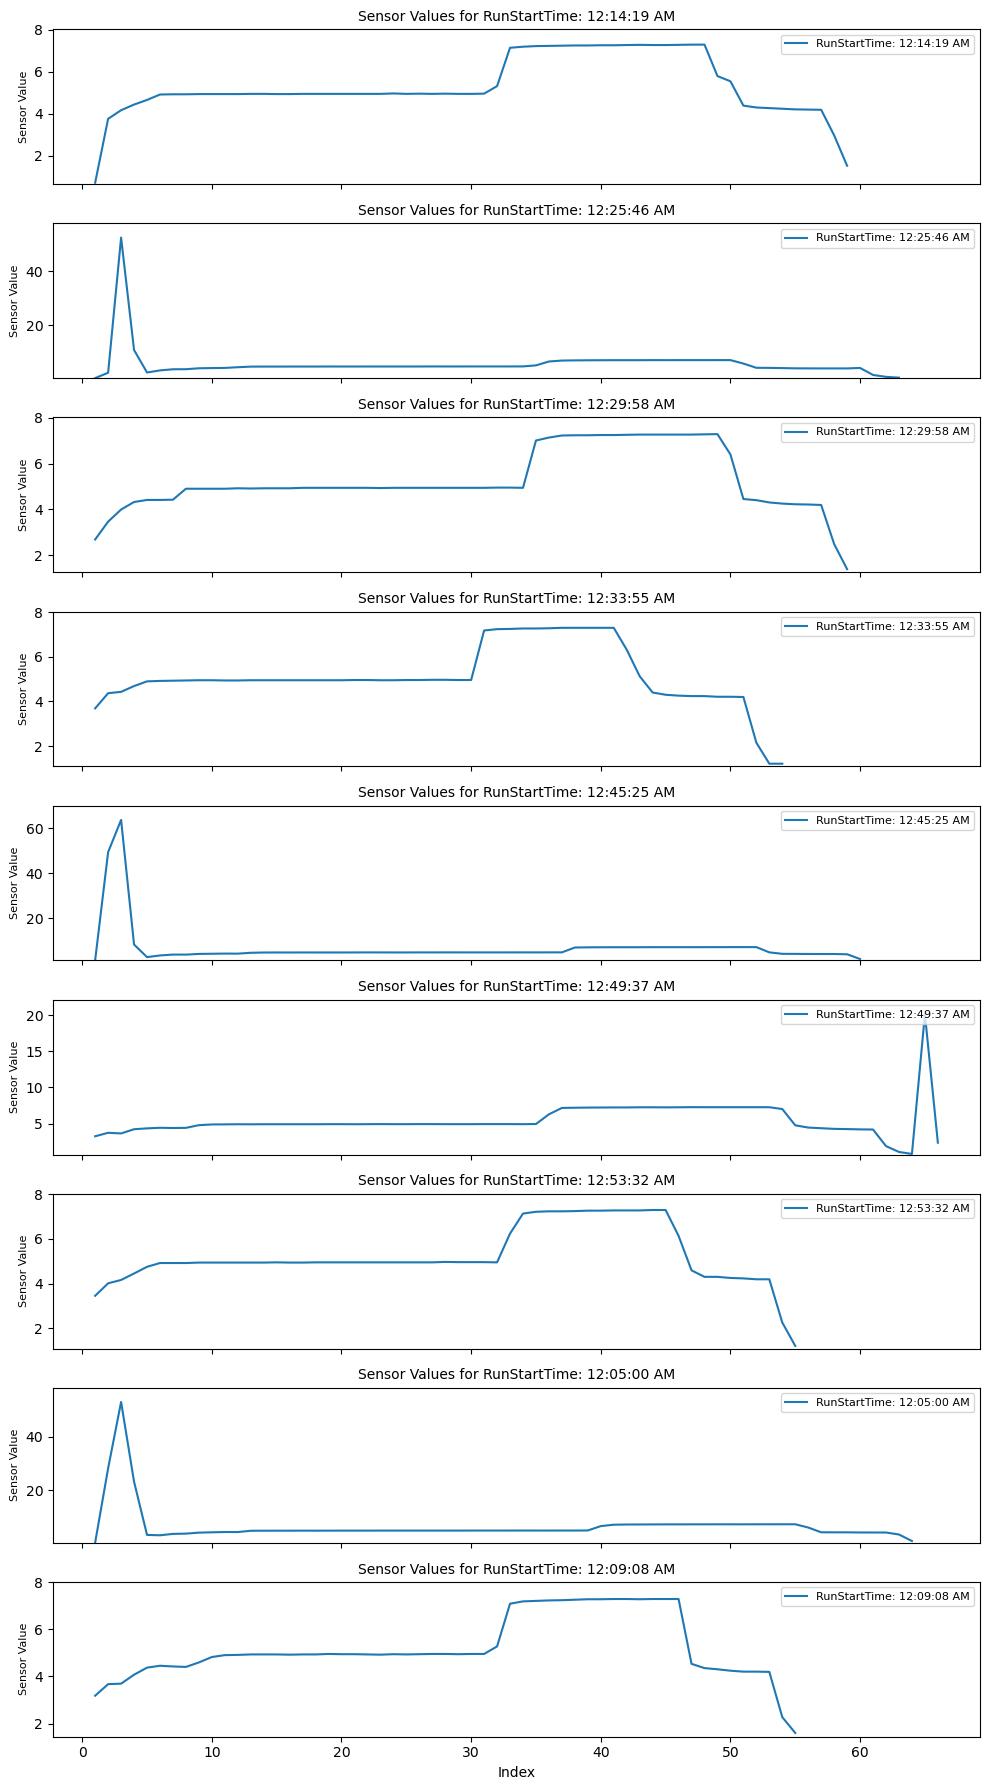

In [45]:
unique_run_times = df['RunStartTime'][df['LOT_ID'] == 'A'].unique()

# Create subplots
num_charts = len(unique_run_times)
fig, axes = plt.subplots(num_charts, 1, figsize=(10, 2 * num_charts), sharex=True)

if num_charts == 1:
    axes = [axes]  # Ensure axes is a list when there's only one subplot

for ax, time in zip(axes, unique_run_times):
    # Filter the data for the specific RunStartTime
    subset = df['BmpcKiosIw'][(df['RunStartTime'] == time) & (df['LOT_ID'] == 'A')].reset_index(drop=True)

    # Plot the data
    ax.plot(subset, label=f'RunStartTime: {time}')
    ax.set_title(f'Sensor Values for RunStartTime: {time}', fontsize=10)
    ax.set_ylabel('Sensor Value', fontsize=8)
    ax.legend(loc='upper right', fontsize=8)

    # Compress the vertical axis
    ax.set_ylim([subset.min() - 0.1 * abs(subset.min()), subset.max() + 0.1 * abs(subset.max())])

# Set a common xlabel
plt.xlabel("Index", fontsize=10)
plt.subplots_adjust(hspace=0.4)  # Adjust spacing if needed
plt.tight_layout()
plt.show()

An example below has no anomaly, as the reading falls between 0 and 150 with no outlier

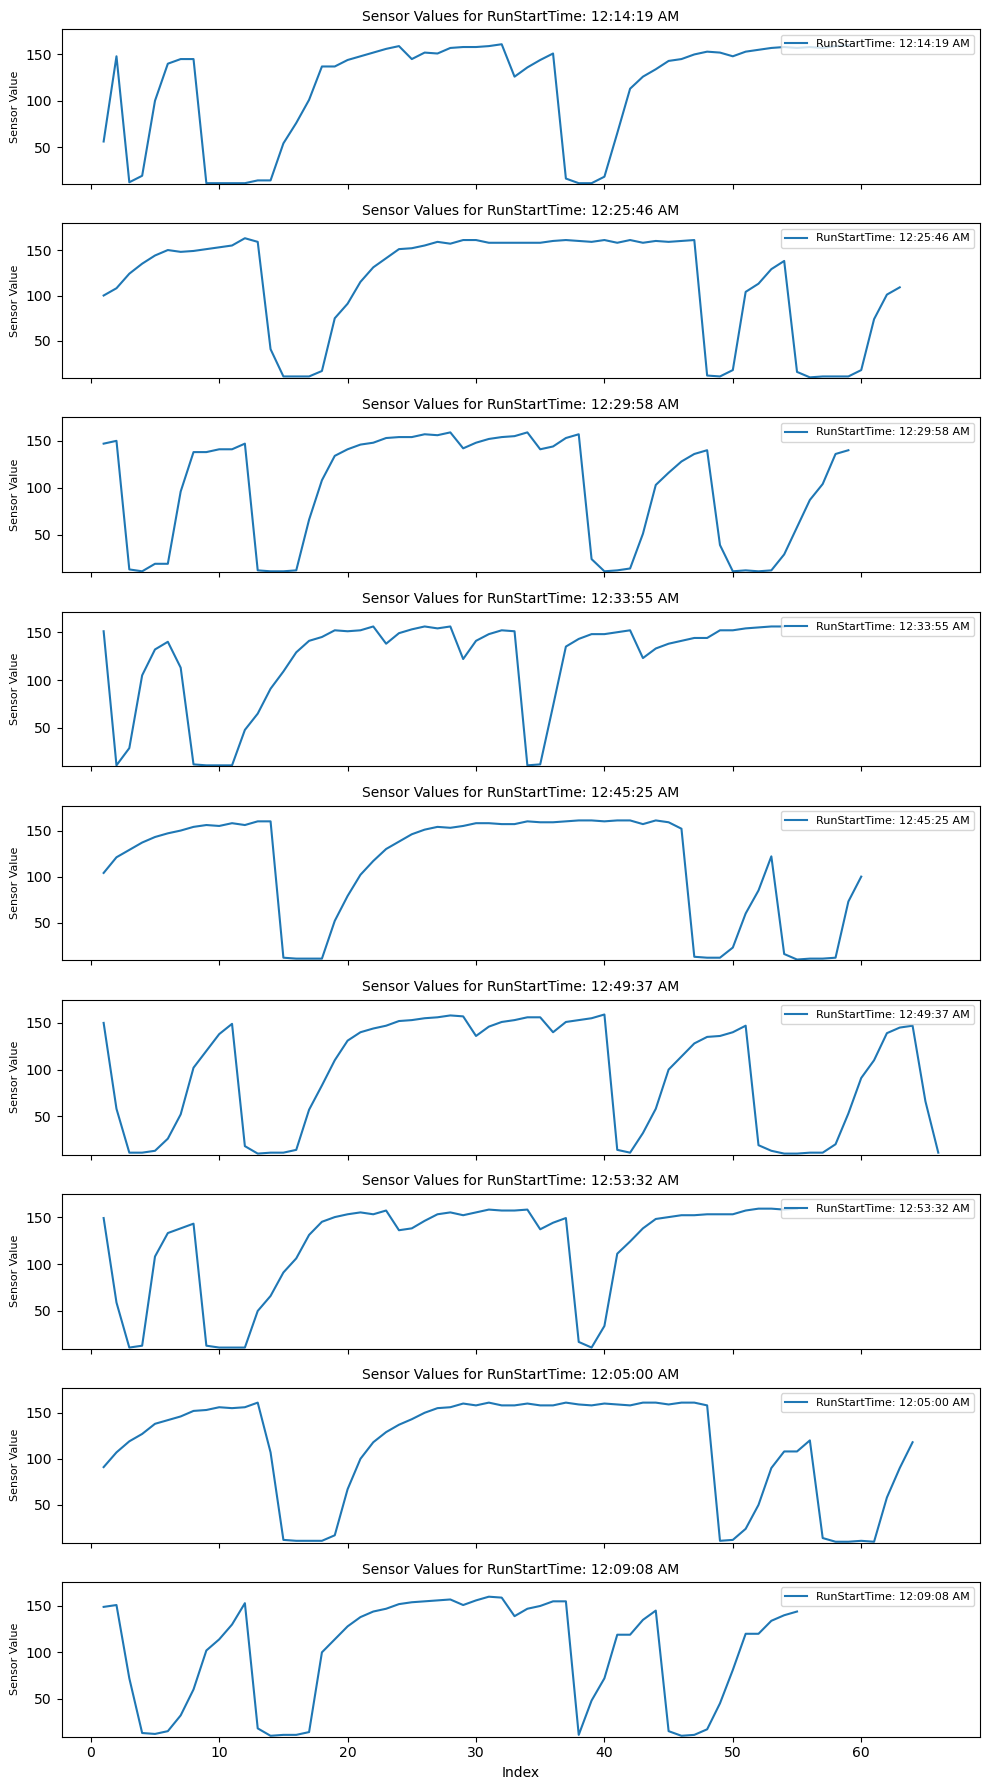

In [43]:
unique_run_times = df['RunStartTime'][df['LOT_ID'] == 'A'].unique()

# Create subplots
num_charts = len(unique_run_times)
fig, axes = plt.subplots(num_charts, 1, figsize=(10, 2 * num_charts), sharex=True)

if num_charts == 1:
    axes = [axes]  # Ensure axes is a list when there's only one subplot

for ax, time in zip(axes, unique_run_times):
    # Filter the data for the specific RunStartTime
    subset = df['OunhHslCRwIRilo'][(df['RunStartTime'] == time) & (df['LOT_ID'] == 'A')].reset_index(drop=True)

    # Plot the data
    ax.plot(subset, label=f'RunStartTime: {time}')
    ax.set_title(f'Sensor Values for RunStartTime: {time}', fontsize=10)
    ax.set_ylabel('Sensor Value', fontsize=8)
    ax.legend(loc='upper right', fontsize=8)

    # Compress the vertical axis
    ax.set_ylim([subset.min() - 0.1 * abs(subset.min()), subset.max() + 0.1 * abs(subset.max())])

# Set a common xlabel
plt.xlabel("Index", fontsize=10)
plt.subplots_adjust(hspace=0.4)  # Adjust spacing if needed
plt.tight_layout()
plt.show()

There are several methods for anomaly detection that have been considered, such as using machine learning approach or with statistical method.  
In the context of this dataset, using statistical method is the suitable choice.

The statistical method being use is the Z-score method:
1. Normalize the reading of the sensor to a z-score , Z score = (sensor reading - mean)/ standard deviation, the mean and standard deviation will be as according to each sensors.
2. Z-score with very high scores will be considered as an anomaly
 

Using the sensor 'BmpcKiosIw' as a benchmark, z-score above 10 (10 times the standard deviation) will be labeled as an anomaly

In [65]:
df['Is_anomaly'] = 0
#df['anomaly_detection'] = 0
for sensor in df.loc[:,'OunhHslCRwIRilo':'WTcLPnkDtRwBuCou'].columns:
  data = df[sensor]#.dropna()

  #df['Is_anomaly'] = 0
  mean = np.mean(data)
  std = np.std(data)
  z_scores = [(x - mean) / std for x in data]
  for i in range(len(z_scores)):
    if (abs(z_scores[i]) > 10) and (pd.isna(df.loc[i, 'EventType'])):
      df.loc[df.index[i], 'Is_anomaly'] = 1
      df.loc[df.index[i], 'anomaly_detection'] = sensor

C:\Users\zhenl\AppData\Local\Temp\ipykernel_4204\2329546101.py:9: RuntimeWarning: invalid value encountered in scalar divide
  z_scores = [(x - mean) / std for x in data]
C:\Users\zhenl\AppData\Local\Temp\ipykernel_4204\2329546101.py:9: RuntimeWarning: invalid value encountered in scalar divide
  z_scores = [(x - mean) / std for x in data]
C:\Users\zhenl\AppData\Local\Temp\ipykernel_4204\2329546101.py:9: RuntimeWarning: invalid value encountered in scalar divide
  z_scores = [(x - mean) / std for x in data]


The result from the anomaly detection is as below, with the location of the LOT_ID , WAFER_ID, and where the sensor is triggered

In [73]:
result = df[['LOT_ID', 'WAFER_ID','anomaly_detection']][df['Is_anomaly'] == 1].value_counts()
result = result.to_frame().reset_index()
result = result.drop(columns=['count'])
result = result.sort_values(by=['LOT_ID', 'WAFER_ID'])
result

,LOT_ID,WAFER_ID,anomaly_detection
23,A,4,RUNSjtpEAy
132,A,13,YATWcaRqpB
100,A,16,tzEiBNrESroInUjAStFCzgiCYU
101,A,19,tzEiBNrESroInUjAStFCzgiCYU
102,B,2,EcBnlzqiTwFxSSBTvYsYOOaCax
103,B,8,EcBnlzqiTwFxSSBTvYsYOOaCax
104,B,8,RUNSjtpEAy
105,B,18,tzEiBNrESroInUjAStFCzgiCYU
99,C,2,EcBnlzqiTwFxSSBTvYsYOOaCax
106,C,2,YATWcaRqpB


Ton find only the LOT_ID and WAFER_ID of detected anomaly 

In [76]:
result = df[['LOT_ID', 'WAFER_ID']][df['Is_anomaly'] == 1].value_counts()
result = result.to_frame().reset_index()
result = result.drop(columns=['count'])
result = result.sort_values(by=['LOT_ID', 'WAFER_ID'])
result

,LOT_ID,WAFER_ID
67,A,4
98,A,13
88,A,16
87,A,19
86,B,2
31,B,8
85,B,18
27,C,2
30,C,10
84,C,19
